In [48]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "C:\\Users\\Ben Huang\\Desktop\\Bootcamp HW\\city_data.csv"
ride_data_to_load = "C:\\Users\\Ben Huang\\Desktop\\Bootcamp HW\\ride_data.csv"

# Read the City and Ride Data
df_city=pd.read_csv(city_data_to_load)
df_city_nodup=df_city.drop_duplicates('city')
#print(df_city_nodup.head())
df_ride=pd.read_csv(ride_data_to_load)
#print(df_ride.head())
# Combine the data into a single dataset
df_combined=pd.merge(df_city_nodup,df_ride,how='outer',on='city')
# Display the data table for preview
df_combined.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [49]:
df_combined.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

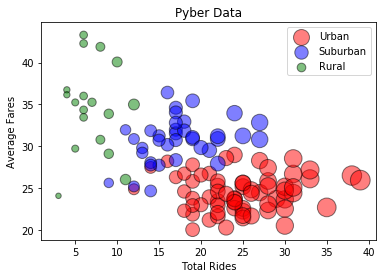

In [59]:
# Obtain the x and y coordinates for each of the three city types
urban=df_combined.loc[(df_combined['type']=='Urban')]
suburban=df_combined.loc[(df_combined['type']=='Suburban')]
rural=df_combined.loc[(df_combined['type']=='Rural')]

average_fare_urban=urban.groupby(['city'])['fare'].mean()
total_rides_urban=urban.groupby(['city']).count()['ride_id']
total_drivers_urban=urban.groupby(['city'])['driver_count'].value_counts()

average_fare_suburban=suburban.groupby(['city'])['fare'].mean()
total_rides_suburban=suburban.groupby(['city']).count()['ride_id']
total_drivers_suburban=suburban.groupby(['city'])['driver_count'].value_counts()

average_fare_rural=rural.groupby(['city'])['fare'].mean()
total_rides_rural=rural.groupby(['city']).count()['ride_id']
total_drivers_rural=rural.groupby(['city'])['driver_count'].value_counts()
# Build the scatter plots for each city types
plt.scatter(total_rides_urban,average_fare_urban,s=total_drivers_urban*10,marker='o',facecolors='red',edgecolors='black',alpha=0.5,label='Urban')
plt.scatter(total_rides_suburban,average_fare_suburban,s=total_drivers_suburban*10,marker='o',facecolors='blue',edgecolors='black',alpha=0.5,label='Suburban')
plt.scatter(total_rides_rural,average_fare_rural,s=total_drivers_rural*10,marker='o',facecolors='green',edgecolors='black', alpha=0.5,label='Rural')
# Incorporate the other graph properties

# Create a legend
plt.legend(loc='upper right')
# Incorporate a text label regarding circle size
plt.xlabel('Total Rides')
plt.ylabel('Average Fares')
plt.title('Pyber Data')
# Save Figure
plt.savefig("C:\\Users\\Ben Huang\\Desktop\\Bootcamp HW\\PyberScatterData.png")
plt.show()

## Total Fares by City Type

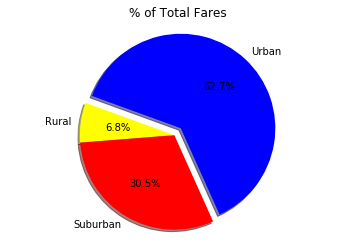

<Figure size 432x288 with 0 Axes>

In [65]:
# Calculate Type Percents
total_fares=df_combined.groupby(['type'])['fare'].sum()
labels=['Rural','Suburban','Urban']
# Build Pie Chart
colors=['yellow','red','blue']
explode=(0,0,0.1)
plt.title('% of Total Fares')
plt.pie(total_fares,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True,startangle=160)
plt.axis('equal')
plt.show()
# Save Figure
plt.savefig("C:\\Users\\Ben Huang\\Desktop\\Bootcamp HW\\TotalFaresPie.png")

## Total Rides by City Type

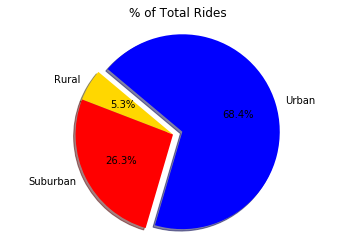

<Figure size 432x288 with 0 Axes>

In [75]:
# Calculate Ride Percents
total_rides=df_combined.groupby(['type'])['ride_id'].count()
# Build Pie Chart
labels=['Rural','Suburban','Urban']
colors=['gold','red','blue']
explode=(0,0,0.1)
plt.title('% of Total Rides')
plt.pie(total_rides,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True,startangle=140)
plt.axis('equal')
plt.show()
# Save Figure
plt.savefig("C:\\Users\\Ben Huang\\Desktop\\Bootcamp HW\\TotalRidesPie.png")

## Total Drivers by City Type

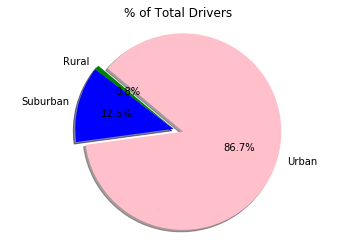

<Figure size 432x288 with 0 Axes>

In [77]:
# Calculate Driver Percents
total_drivers=df_combined.groupby(['type'])['driver_count'].sum()
# Build Pie Charts
labels=['Rural','Suburban','Urban']
colors=['green','blue','pink']
explode=(0,0,0.1)
plt.title('% of Total Drivers')
plt.pie(total_drivers,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True,startangle=140)
plt.axis('equal')
plt.show()
# Save Figure
plt.savefig("C:\\Users\\Ben Huang\\Desktop\\Bootcamp HW\\TotalDriversPie.png")